## week7 exercise
### Fourier Series expansion of Atlanta temperature

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')

### load the temp data

In [20]:
atl=np.genfromtxt('DATA/atlanta_temperature.tsv',delimiter='\t')
x = atl[:,0]
y = atl[:,2]
N = np.size(x)     # number of data points
T = x[N-1]-x[0]+1  # the length of data record
dT= 1.             # data points are 1 year apart

### calculate Fourier coefficients

In [132]:
# --------- set the number of coeffs to calculate 
K=20
# --------
A=np.zeros((K,1))
B=np.zeros((K,1))
for n in range(0,K):
    cosn=np.cos(2*np.pi*n*x/T)   # cosine function of period T/n
    sinn=np.sin(2*np.pi*n*x/T)   # sine function of period T/n
    A[n]=2/T*np.sum(y.T@cosn*dT) # take the inner product to get A
    B[n]=2/T*np.sum(y.T@sinn*dT) # take the inner product to get B

### now assemble Fourier Series

In [133]:
yest = A[0]/2*np.ones((N))
for n in range(1,K):
    cosn=np.cos(2*np.pi*n*x/T)
    sinn=np.sin(2*np.pi*n*x/T)
    yest=yest+A[n]*cosn+B[n]*sinn

### plot the results

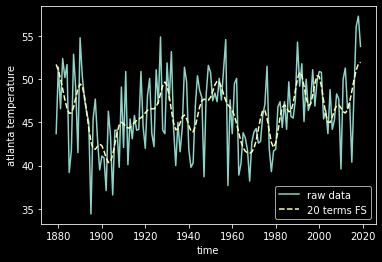

In [139]:
# plot the raw data first
plt.plot(x,y)
# overlay the Fourier Series
plt.plot(x,yest,'--')
plt.xlabel('time')
plt.ylabel('atlanta temperature')
plt.legend(('raw data',str(K)+' terms FS'))